<section id="title-slide">
<table class="kms" border="0"  width="100%"  style="width:100%;text-align:center;">
  <tr>
    <td width="99%" align="center" ><p class="fragment fade-down" data-fragment-index="3"><img src="./img/enic.jpg" width="350" height="350" style="border-radius: 10px"></p></td>
    <td width="99%" align="center"><p class="fragment fade-up" data-fragment-index="3"><img src="./img/ibm.jpg" width="350" height="350" style="border-radius: 10px"></p></td> 
    <td width="99%" align="center"><p class="fragment fade-down" data-fragment-index="3"><img src="./img/uvt.jpg" width="350" height="350" style="border-radius: 10px"></p></td>
  </tr>
</table>
    <br><h1><i><p class="fragment" data-fragment-index="1">Early Prediction of Sepsis From Clinical
Data</p></i></h1>
    <h4><i><p class="fragment" data-fragment-index="1">Master Degree in Computer Science
Speciality : Data Science and Mobiquity</p></i></h4>
    <br><br><br><br><br><br>
    <div class="uu_title_container">
        <smaller>
        <div class='column'><p class="fragment" data-fragment-index="2">
            <b>Presented by:</b><br>Abdallah Khemais
            </p></div>  
        <div class='column'><p class="fragment" data-fragment-index="2">
            <b>Academic guidance: </b> <br>Dr Walid Barhoumi
            </p></div>    
       </smaller>
    </div>
</section>

<h2 ><p class="fragment fade-up" data-fragment-index="1"> MLP</p></h2>



In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [50]:
dataset = pd.read_csv("sepsis_data.csv")
dataset.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,61.0,99.0,36.44,124.0,65.0,43.0,17.5,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,2,0
1,64.0,98.0,36.44,125.0,64.0,41.0,27.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,3,0
2,56.0,100.0,36.44,123.0,65.0,41.0,9.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,4,0
3,66.0,99.0,36.22,120.0,67.0,43.0,23.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,5,0
4,94.0,100.0,36.22,194.0,116.0,66.0,14.0,0.0,0.0,22.0,...,11.0,0.0,158.0,75.91,0,0.0,1.0,-98.6,6,0


In [51]:
from sklearn.utils import resample

#resample the data 
df_majority = dataset[dataset.SepsisLabel==0]
df_minority = dataset[dataset.SepsisLabel==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=57070,    # to match majority class
                                 random_state=123) # reproducible results

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
X = df_upsampled[df_upsampled.columns[0:40]].values
Y = df_upsampled[df_upsampled.columns[40:]].values

#get the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [52]:
#showing the results
import pickle
filename = 'finalized_model2.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9731470124408621


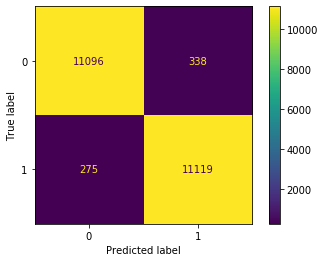

In [5]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
predicted = loaded_model.predict(X_test)
cm=confusion_matrix(Y_test,predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=loaded_model.classes_)
disp.plot()
plt.show()

In [47]:
def plot_ROC(y_test, y_score, n_classes=2):
    from sklearn.metrics import precision_score, classification_report,average_precision_score, accuracy_score, balanced_accuracy_score, precision_recall_curve, f1_score, auc, roc_curve
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr['positive'], tpr['positive'], _ = roc_curve(y_test, y_score)
    roc_auc['positive'] = auc(fpr['positive'], tpr['positive'])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    lw = 2
    plt.plot(fpr['positive'], tpr['positive'], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['positive'])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

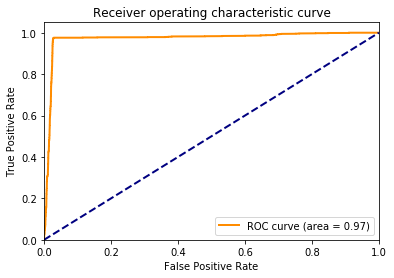

In [48]:
plot_ROC(Y_test,yhat_probas[:,1])

<h1 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">5 Conclusion & Future Scope</span></p></h1>
 </div>  
    <div class='column' id='frame'>
        <br><br><br>
        <center><img id="undraw_col_img" src="./img/undraw_lightbulb.svg"></center>
    </div>
       


## References

<div class="footer">These slides were made using <a href="https://github.com/damianavila/RISE"><code>RISE</code></a>, <a href="https://fonts.google.com/">Google Fonts</a> and <a href="https://undraw.co">Undraw Illustrations</a></div>